In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel('data.xlsx',index_col='Shipment ID')

In [3]:
df.head()

,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
Shipment ID,,,,,,,,,,
SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


In [4]:
df.shape

(20000, 10)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, SHIP000000 to SHIP019999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Origin                 20000 non-null  object        
 1   Destination            20000 non-null  object        
 2   Shipment Date          20000 non-null  datetime64[ns]
 3   Planned Delivery Date  20000 non-null  datetime64[ns]
 4   Actual Delivery Date   20000 non-null  datetime64[ns]
 5   Vehicle Type           19403 non-null  object        
 6   Distance (km)          20000 non-null  int64         
 7   Weather Conditions     20000 non-null  object        
 8   Traffic Conditions     20000 non-null  object        
 9   Delayed                20000 non-null  object        
dtypes: datetime64[ns](3), int64(1), object(6)
memory usage: 1.7+ MB


#### Handling Missing Values


In [6]:
df.isna().sum()

Origin                     0
Destination                0
Shipment Date              0
Planned Delivery Date      0
Actual Delivery Date       0
Vehicle Type             597
Distance (km)              0
Weather Conditions         0
Traffic Conditions         0
Delayed                    0
dtype: int64

In [7]:
value_counts = df['Vehicle Type'].value_counts(normalize=True)
print(value_counts)

Vehicle Type
Lorry        0.251404
Truck        0.250477
Trailer      0.249343
Container    0.248776
Name: proportion, dtype: float64


In [8]:
categories = value_counts.index.to_list()
probabilties = value_counts.values.tolist()

In [9]:
print(categories,probabilties)

['Lorry', 'Truck', 'Trailer', 'Container'] [0.25140442199659846, 0.25047673040251506, 0.2493428851208576, 0.24877596248002887]


In [10]:
random_choices = np.random.choice(categories,size=df['Vehicle Type'].isna().sum(),p=probabilties)

In [11]:
df.loc[df['Vehicle Type'].isnull(),'Vehicle Type'] = random_choices

##### We will not consider the dates for training purpose as they are direct representation of whether the shipment is dlayed or not. If we use dates for traning the data by calculating the number of days delayed it will become depedent feature

In [12]:
df.drop(columns=['Shipment Date','Planned Delivery Date','Actual Delivery Date'],inplace=True)
df.head()

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
Shipment ID,,,,,,,
SHIP000000,Jaipur,Mumbai,Trailer,1603,Rain,Light,Yes
SHIP000001,Bangalore,Delhi,Trailer,1237,Storm,Moderate,Yes
SHIP000002,Mumbai,Chennai,Truck,1863,Clear,Light,No
SHIP000003,Hyderabad,Ahmedabad,Container,1374,Clear,Light,No
SHIP000004,Chennai,Kolkata,Container,676,Clear,Heavy,Yes


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20000 entries, SHIP000000 to SHIP019999
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Origin              20000 non-null  object
 1   Destination         20000 non-null  object
 2   Vehicle Type        20000 non-null  object
 3   Distance (km)       20000 non-null  int64 
 4   Weather Conditions  20000 non-null  object
 5   Traffic Conditions  20000 non-null  object
 6   Delayed             20000 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.7+ MB


##### We should address the issue of inconsistent or outlier values in the Distance (km) column based on specific grouping parameters such as Origin, Destination, Vehicle Type, Weather Conditions, and Traffic Conditions. The goal is to identify and replace outliers with statistically meaningful values to ensure the data's consistency and reliabilit

In [14]:
df[(df['Origin'] == 'Delhi') & (df['Destination'] == 'Mumbai') & (df['Vehicle Type']=='Truck') & (df['Weather Conditions']=='Clear') & (df['Traffic Conditions']=='Light')]

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
Shipment ID,,,,,,,
SHIP002124,Delhi,Mumbai,Truck,1551,Clear,Light,Yes
SHIP002652,Delhi,Mumbai,Truck,1293,Clear,Light,No
SHIP004225,Delhi,Mumbai,Truck,1109,Clear,Light,No
SHIP004645,Delhi,Mumbai,Truck,1346,Clear,Light,Yes
SHIP006064,Delhi,Mumbai,Truck,1490,Clear,Light,No
SHIP007323,Delhi,Mumbai,Truck,584,Clear,Light,No
SHIP007735,Delhi,Mumbai,Truck,958,Clear,Light,No
SHIP008154,Delhi,Mumbai,Truck,853,Clear,Light,No
SHIP010239,Delhi,Mumbai,Truck,519,Clear,Light,No


In [15]:
df.groupby(['Origin', 'Destination', 'Vehicle Type','Weather Conditions','Traffic Conditions'])['Distance (km)'].nunique()

Origin     Destination  Vehicle Type  Weather Conditions  Traffic Conditions
Ahmedabad  Bangalore    Container     Clear               Heavy                  3
                                                          Light                 17
                                                          Moderate              11
                                      Fog                 Heavy                  2
                                                          Light                  2
                                                                                ..
Pune       Mumbai       Truck         Fog                 Moderate               6
                                      Rain                Heavy                  3
                                                          Light                  6
                                                          Moderate               7
                                      Storm               Moderate               1
Name: Dist

In [16]:
# Grouping and calculating mean and standard deviation for each group
mean_distances = df.groupby(['Origin', 'Destination', 'Vehicle Type', 
                             'Weather Conditions', 'Traffic Conditions'])['Distance (km)'].transform('mean')
std_distances = df.groupby(['Origin', 'Destination', 'Vehicle Type', 
                            'Weather Conditions', 'Traffic Conditions'])['Distance (km)'].transform('std')

# Calculating lower and upper bounds
lower_bounds = mean_distances -  std_distances
upper_bounds = mean_distances + std_distances

# Identifying and replacing outliers
is_outlier = (df['Distance (km)'] < lower_bounds) | (df['Distance (km)'] > upper_bounds)
df.loc[is_outlier, 'Distance (km)'] = mean_distances[is_outlier]

C:\Users\Acer\AppData\Local\Temp\ipykernel_34048\2034238708.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[1155.57142857 1354.         1170.14285714 ... 1381.         1004.16666667
 1228.85      ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[is_outlier, 'Distance (km)'] = mean_distances[is_outlier]


In [17]:
df[(df['Origin'] == 'Delhi') & (df['Destination'] == 'Mumbai') & (df['Vehicle Type']=='Truck') & (df['Weather Conditions']=='Clear') & (df['Traffic Conditions']=='Light')]

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
Shipment ID,,,,,,,
SHIP002124,Delhi,Mumbai,Truck,1017.05,Clear,Light,Yes
SHIP002652,Delhi,Mumbai,Truck,1293.00,Clear,Light,No
SHIP004225,Delhi,Mumbai,Truck,1109.00,Clear,Light,No
SHIP004645,Delhi,Mumbai,Truck,1346.00,Clear,Light,Yes
SHIP006064,Delhi,Mumbai,Truck,1017.05,Clear,Light,No
SHIP007323,Delhi,Mumbai,Truck,1017.05,Clear,Light,No
SHIP007735,Delhi,Mumbai,Truck,958.00,Clear,Light,No
SHIP008154,Delhi,Mumbai,Truck,853.00,Clear,Light,No
SHIP010239,Delhi,Mumbai,Truck,1017.05,Clear,Light,No


##### As we have replaced some values with the mean values there must be duplicates so we need to delete duplicate values

In [18]:
df.duplicated().sum()

np.int64(4386)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.head()

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
Shipment ID,,,,,,,
SHIP000000,Jaipur,Mumbai,Trailer,1603.000000,Rain,Light,Yes
SHIP000001,Bangalore,Delhi,Trailer,1237.000000,Storm,Moderate,Yes
SHIP000002,Mumbai,Chennai,Truck,1155.571429,Clear,Light,No
SHIP000003,Hyderabad,Ahmedabad,Container,1374.000000,Clear,Light,No
SHIP000004,Chennai,Kolkata,Container,1354.000000,Clear,Heavy,Yes


In [21]:
df['Distance (km)'] = df['Distance (km)'].round().astype('int')

In [22]:
df.head()

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
Shipment ID,,,,,,,
SHIP000000,Jaipur,Mumbai,Trailer,1603,Rain,Light,Yes
SHIP000001,Bangalore,Delhi,Trailer,1237,Storm,Moderate,Yes
SHIP000002,Mumbai,Chennai,Truck,1156,Clear,Light,No
SHIP000003,Hyderabad,Ahmedabad,Container,1374,Clear,Light,No
SHIP000004,Chennai,Kolkata,Container,1354,Clear,Heavy,Yes


In [23]:
df.shape

(15614, 7)

### Analysing the categorical columns

In [24]:
df['Origin'].value_counts()

Origin
Pune         1658
Delhi        1606
Mumbai       1602
Bangalore    1582
Kolkata      1554
Chennai      1553
Ahmedabad    1552
Hyderabad    1538
Lucknow      1493
Jaipur       1476
Name: count, dtype: int64

In [25]:
df['Destination'].value_counts()

Destination
Jaipur       1609
Bangalore    1590
Ahmedabad    1586
Chennai      1583
Lucknow      1572
Mumbai       1544
Pune         1544
Hyderabad    1536
Delhi        1531
Kolkata      1519
Name: count, dtype: int64

In [26]:
df['Weather Conditions'].value_counts()

Weather Conditions
Clear    9960
Rain     2767
Fog      1929
Storm     958
Name: count, dtype: int64

In [27]:
df['Traffic Conditions'].value_counts()

Traffic Conditions
Light       7548
Moderate    5423
Heavy       2643
Name: count, dtype: int64

In [28]:
df['Vehicle Type'].value_counts()

Vehicle Type
Lorry        3922
Container    3909
Trailer      3898
Truck        3885
Name: count, dtype: int64

#### Data Visualisation

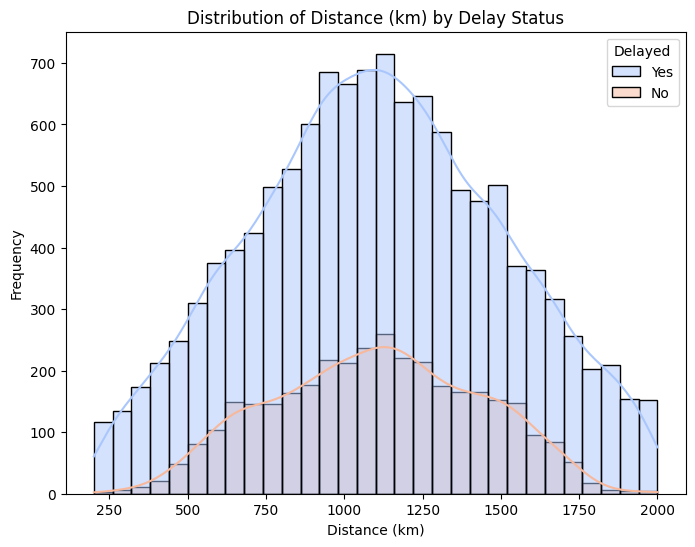

In [30]:
# Distribution of Distance (km) by Delay Status
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Distance (km)', hue='Delayed', kde=True, bins=30, palette='coolwarm')
plt.title('Distribution of Distance (km) by Delay Status')
plt.xlabel('Distance (km)')
plt.ylabel('Frequency')
plt.show()

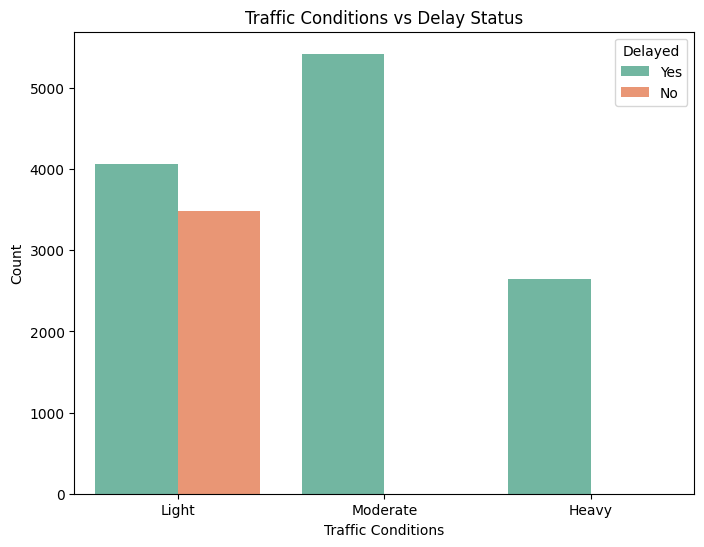

In [32]:
# Traffic Conditions vs Delayed
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Traffic Conditions', hue='Delayed', palette='Set2')
plt.title('Traffic Conditions vs Delay Status')
plt.xlabel('Traffic Conditions')
plt.ylabel('Count')
plt.show()


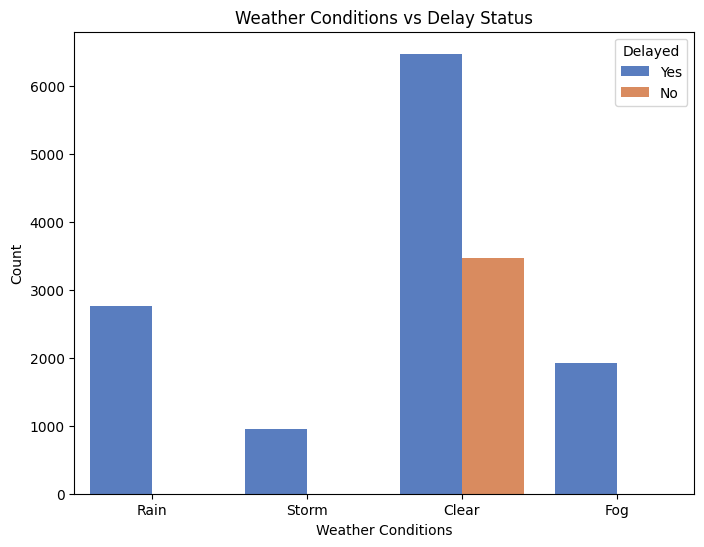

In [34]:
# Weather Conditions vs Delay Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Weather Conditions', hue='Delayed', palette='muted')
plt.title('Weather Conditions vs Delay Status')
plt.xlabel('Weather Conditions')
plt.ylabel('Count')
plt.show()


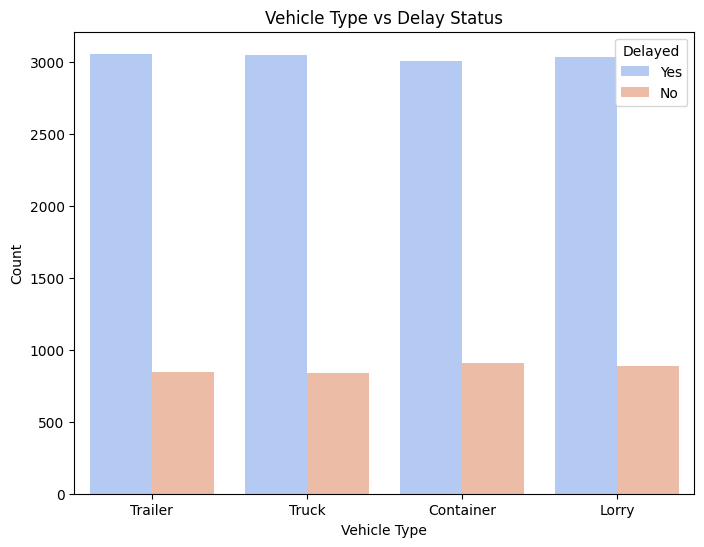

In [36]:
# Vehicle Type vs Delay Status
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Vehicle Type', hue='Delayed', palette='coolwarm')
plt.title('Vehicle Type vs Delay Status')
plt.xlabel('Vehicle Type')
plt.ylabel('Count')
plt.show()

### Label encoding categorical columns

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

categorical_columns = ['Origin', 'Destination','Weather Conditions','Traffic Conditions','Vehicle Type']

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le 


In [40]:
label_encoders.values()

dict_values([LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder(), LabelEncoder()])

In [41]:
for l in label_encoders.values():
    print(l.classes_)

['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Jaipur' 'Kolkata'
 'Lucknow' 'Mumbai' 'Pune']
['Ahmedabad' 'Bangalore' 'Chennai' 'Delhi' 'Hyderabad' 'Jaipur' 'Kolkata'
 'Lucknow' 'Mumbai' 'Pune']
['Clear' 'Fog' 'Rain' 'Storm']
['Heavy' 'Light' 'Moderate']
['Container' 'Lorry' 'Trailer' 'Truck']


In [42]:
import joblib
joblib.dump(label_encoders,'label_encoders.pkl')

['label_encoders.pkl']

In [43]:
df['Delayed'] = le.fit_transform(df['Delayed'])

In [44]:
df.head()

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
Shipment ID,,,,,,,
SHIP000000,5,8,2,1603,2,1,1
SHIP000001,1,3,2,1237,3,2,1
SHIP000002,8,2,3,1156,0,1,0
SHIP000003,4,0,0,1374,0,1,0
SHIP000004,2,6,0,1354,0,0,1


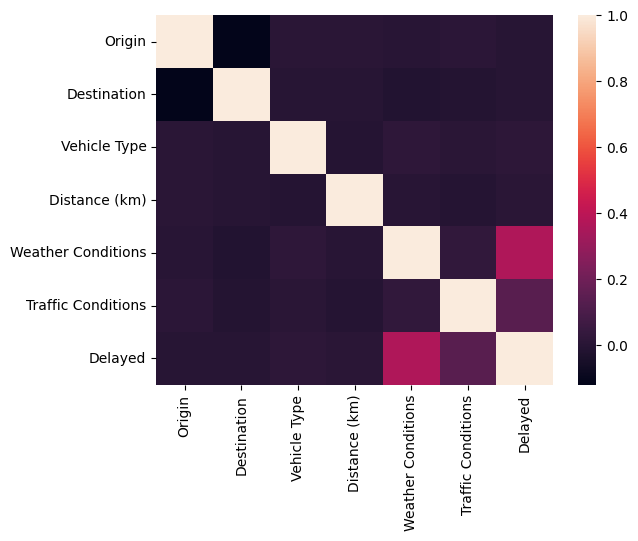

In [46]:
sns.heatmap(df.corr())
plt.show()

In [47]:
df.columns

Index(['Origin', 'Destination', 'Vehicle Type', 'Distance (km)',
       'Weather Conditions', 'Traffic Conditions', 'Delayed'],
      dtype='object')

### ML Model

##### Splitting the data

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x = df.drop('Delayed',axis=1)
y = df['Delayed']

In [50]:
print(x.shape)
print(y.shape)

(15614, 6)
(15614,)


In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30)

In [52]:
print(x_train.shape)
print(y_train.shape)

(10929, 6)
(10929,)


In [53]:
print(x_test.shape)
print(y_test.shape)

(4685, 6)
(4685,)


##### Logistic Regression

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

In [55]:
scaler =  StandardScaler()

In [56]:
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [57]:
joblib.dump(scaler,'scaler.pkl')

['scaler.pkl']

In [58]:
lr = LogisticRegression()

In [59]:
param_grid = {'C': [0.01, 0.1, 1],'penalty':['l1','l2','elasticnet'],'max_iter':[100,1000,5000],'solver': ['liblinear', 'lbfgs', 'saga']}
gs = GridSearchCV(lr, param_grid, cv=5, scoring='accuracy')

In [60]:
gs.fit(x_train,y_train)

d:\Arogo_Assigment\Shipment_Delay_Prediction\venv\lib\site-packages\sklearn\svm\_base.py:1243: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\Arogo_Assigment\Shipment_Delay_Prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
180 fits failed out of a total of 405.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "d:\Arogo_Assigment\Shipment_Delay_Prediction\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "d:\Arogo_Assigment\Shipment_Delay_Prediction\venv\lib

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'max_iter': [100, 1000, 5000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'lbfgs', 'saga']},
             scoring='accuracy')

In [61]:
print(gs.best_params_)

{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [62]:
predictions = gs.predict(x_test)

In [63]:
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score

In [64]:
accuracy = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions,average='binary')
precision = precision_score(y_test,predictions,average='binary')
recall = recall_score(y_test,predictions,average='binary')

In [65]:
print(f"Accuracy score {accuracy}")
print(f"f1 score : {f1}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")

Accuracy score 0.7741728922091782
f1 score : 0.8727141482194418
Precision : 0.7741728922091782
Recall : 1.0


#### Random Forest

In [66]:
from sklearn.ensemble import RandomForestClassifier

In [67]:
rf = RandomForestClassifier()

In [68]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [69]:
gs = GridSearchCV(rf,param_grid,cv=5,scoring='accuracy')

In [70]:
gs.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [71]:
gs.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 200}

In [72]:
predictions = gs.predict(x_test)

In [73]:
accuracy = accuracy_score(y_test,predictions)
f1 = f1_score(y_test,predictions,average='binary')
precision = precision_score(y_test,predictions,average='binary')
recall = recall_score(y_test,predictions,average='binary')

In [74]:
print(f"Accuracy score {accuracy}")
print(f"f1 score : {f1}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")

Accuracy score 0.9131270010672359
f1 score : 0.9405579085730977
Precision : 1.0
Recall : 0.8877860490763717


In [75]:
## Random Forest is performing better so will we consider it

In [76]:
joblib.dump(gs,'model.pkl')

['model.pkl']